# Hey, Taxi!

In [1]:
#In case you don't have these libraries installed, uncomment only the next line with ctr+/ and run the cell
# !pip install pandas numpy matplotlib seaborn

#For installing Basemap package, please, follow the instructions under: https://matplotlib.org/basemap/users/installing.html

# Alternatively, you can download Anaconda package, which contains aforementioned plus other essential libraries except Basemap
# for scientific work. Visit: https://www.continuum.io/download

In [2]:
import pandas as pd                                #Working with csv, xls and other type of data files
import numpy as np                                 #Working with calculus
import matplotlib.pyplot as plt                    #Plotting library, similar to Matlab's
import seaborn as sns                              #Simplified visualization library built on Matplotlib
from mpl_toolkits.basemap import Basemap
from matplotlib import cm                          #Colormap toolkit from matplotlib

import warnings                                    #Supress warnings
warnings.filterwarnings("ignore")

import os                                          #Miscellaneous OS system tool
os.chdir("")  #Change working directory

plt.rcParams['figure.figsize'] = (12,10)           #Setting global plot size

# Load the data

In [3]:
data = pd.read_csv("uber-raw-data-apr14.csv")

In [4]:
#Let's see how the data looks like
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [6]:
#We have Dat/Time column, but it is string type. Let's convert it to Datetime object and also add
#some other columns like Weekday, Hour, Minute columns

data["Date/Time"] = pd.to_datetime(data["Date/Time"])
data["Weekday"] = data["Date/Time"].apply(lambda x: x.strftime('%A'))
data["Day of the Week"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
data["Minute"] = data["Date/Time"].apply(lambda x: x.minute)

In [7]:
#Now, our data should look better
data.head()

,Date/Time,Lat,Lon,Base,Weekday,Day of the Week,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,0,33


# When will I need an UBER ride?

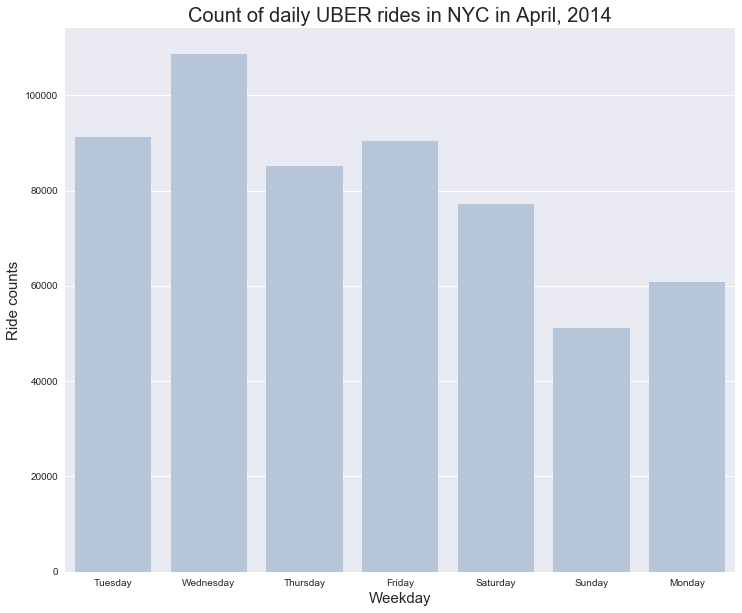

In [8]:
#Let's first look at daily rides in general
sns.countplot(data["Weekday"], color="lightsteelblue")
plt.title("Count of daily UBER rides in NYC in April, 2014", fontsize = 20)
plt.xlabel("Weekday", fontsize = 15)
plt.ylabel("Ride counts", fontsize = 15)
plt.tick_params(labelsize = 10)
plt.show()

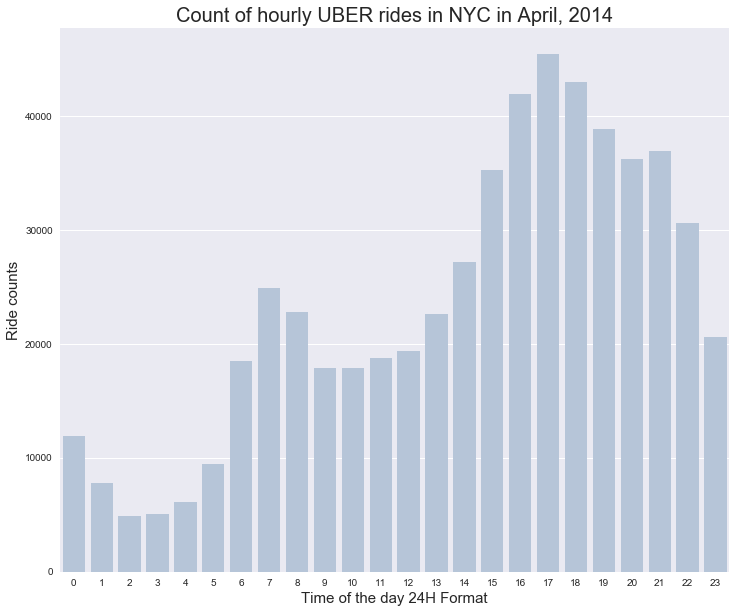

In [9]:
#Living in NYC, it is good to know at what time of the day you may need a ride 
sns.countplot(data["Hour"], color="lightsteelblue")
plt.title("Count of hourly UBER rides in NYC in April, 2014", fontsize = 20)
plt.xlabel("Time of the day 24H Format", fontsize = 15)
plt.ylabel("Ride counts", fontsize = 15)
plt.tick_params(labelsize = 10)
plt.show()

As expected, we see high number of rides after 5pm, when office work is over. Surprisingly, on Wednesdays people need taxi more than on Mondays or Fridays. Having mentioned Fridays, let's look at Fridays in particular. 

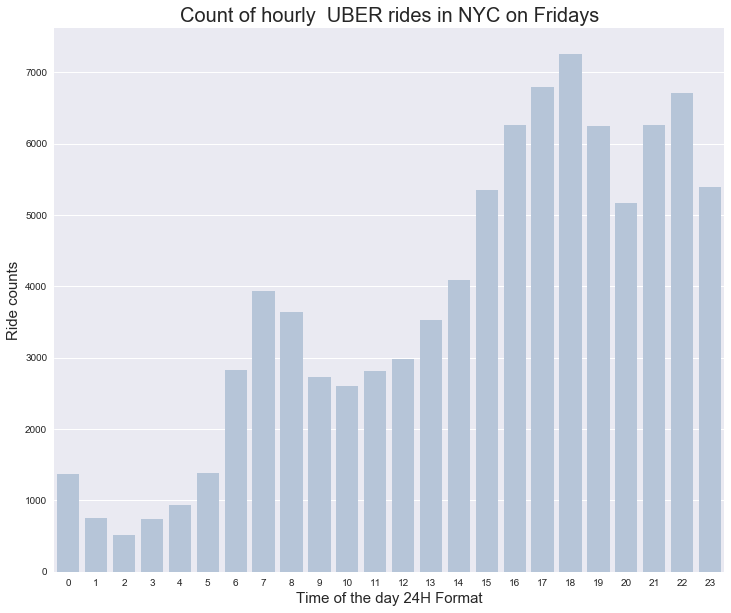

In [10]:
sns.countplot(data[data["Weekday"] =="Friday"]["Hour"].reset_index(drop = True), color="lightsteelblue")
plt.title("Count of hourly  UBER rides in NYC on Fridays", fontsize = 20)
plt.xlabel("Time of the day 24H Format", fontsize = 15)
plt.ylabel("Ride counts", fontsize = 15)
plt.tick_params(labelsize = 10)
plt.show()

Again, as expected, Fridays' afterwork social activities increase the need of taxis. Thinking in the same direction, there may be good odds that, on Sundays situation should look somehow similar. Let's lhave a look

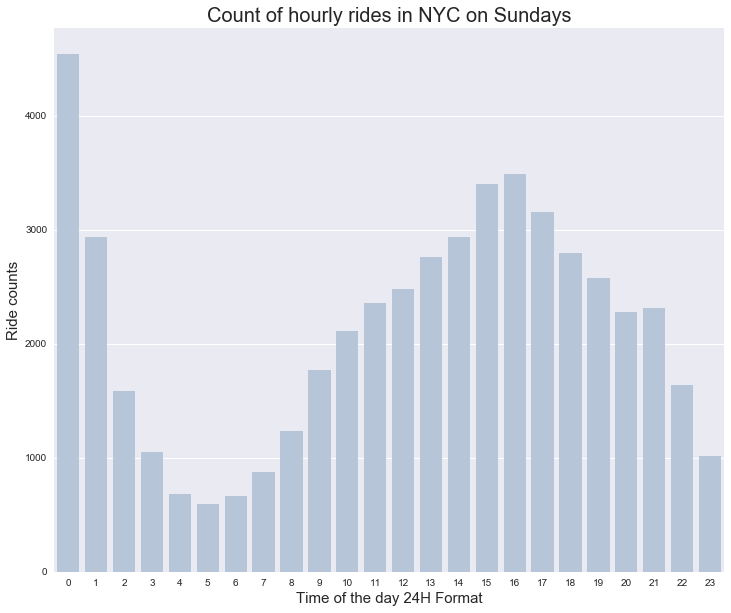

In [11]:
sns.countplot(data[data["Weekday"] =="Sunday"]["Hour"].reset_index(drop = True), color="lightsteelblue")
plt.title("Count of hourly rides in NYC on Sundays", fontsize = 20)
plt.xlabel("Time of the day 24H Format", fontsize = 15)
plt.ylabel("Ride counts", fontsize = 15)
plt.tick_params(labelsize = 10)
plt.show()

Now, it is time to generalize things a bit. Let's combine all stats in one graph

In [12]:
#Making a Dataframe called summary with summary stats
summary = data.groupby(["Weekday", "Hour"])["Date/Time"].count()
summary = summary.reset_index()
summary = pd.DataFrame(summary)
summary.head(10)

,Weekday,Hour,Date/Time
0,Friday,0,1367
1,Friday,1,760
2,Friday,2,513
3,Friday,3,736
4,Friday,4,932
5,Friday,5,1382
6,Friday,6,2836
7,Friday,7,3943
8,Friday,8,3648
9,Friday,9,2732


In [13]:
#Better dealing with counts, not the time itself :)
summary = summary.rename(columns = {"Date/Time":"Counts"})

In [14]:
summary.head()

,Weekday,Hour,Counts
0,Friday,0,1367
1,Friday,1,760
2,Friday,2,513
3,Friday,3,736
4,Friday,4,932


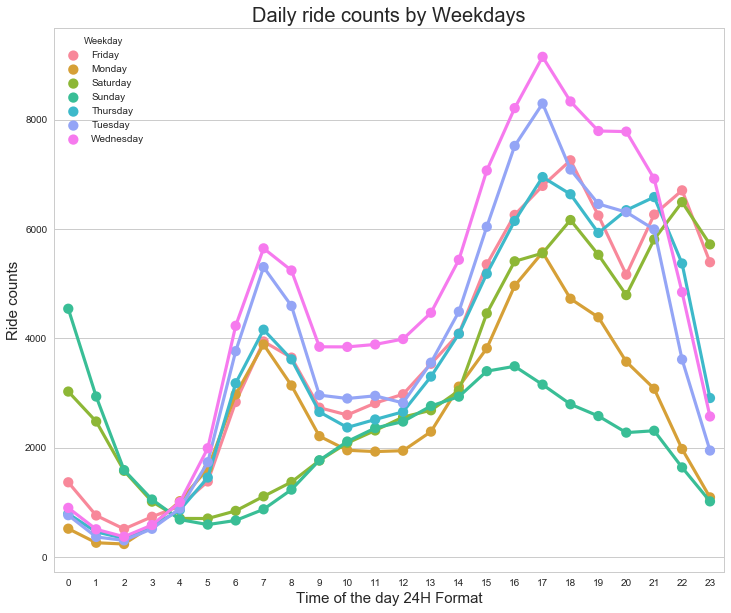

In [15]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Hour", y="Counts", hue="Weekday", data=summary)
plt.xlabel("Time of the day 24H Format", fontsize = 15)
plt.ylabel("Ride counts", fontsize = 15)
plt.title("Daily ride counts by Weekdays", fontsize = 20)
plt.tick_params(labelsize = 10)
plt.show()

Wednseday is almost always one step ahead of other days. Least active day is Sunday

# Heatmapping

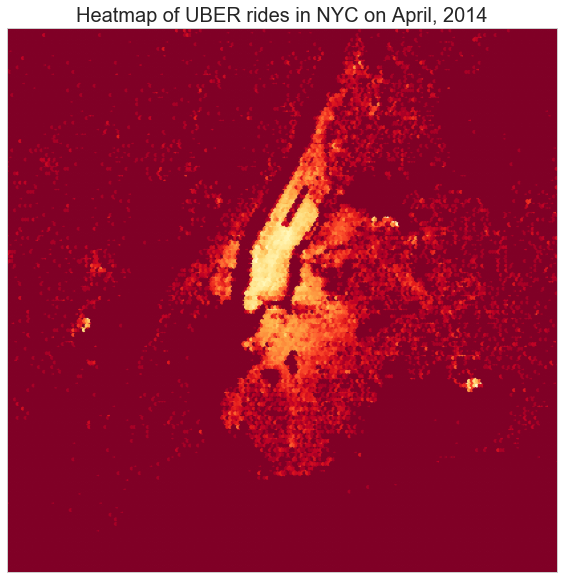

In [16]:
#Give the coordinates of the map
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
#Load data points. Beware that, I use Lon, Lat schema
x, y = m(data['Lon'].values, data['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r)
plt.title("Heatmap of UBER rides in NYC on April, 2014", fontsize = 20)
plt.show()

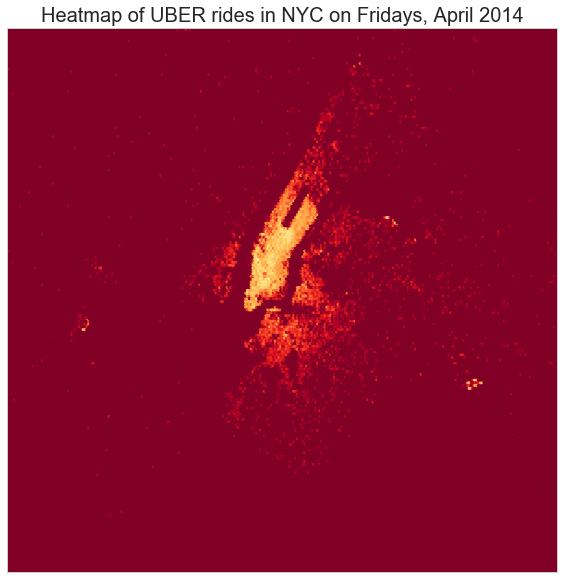

In [17]:
#Do the same, but just for Friday

#Give the coordinates of the map
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(data.loc[data["Weekday"] == "Friday", "Lon"].reset_index(drop = True).values, 
         data.loc[data["Weekday"] == "Friday", "Lat"].reset_index(drop = True).values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r)
plt.title("Heatmap of UBER rides in NYC on Fridays, April 2014", fontsize = 20)
plt.show()